<div style="text-align: center;">
  <img src="https://github.com/dinamohsin/Social-Media-Sentiment-Analysis-/blob/main/img/NLP.png?raw=true?raw=true">
</div>


# Natural Language Processing (NLP)

<div style="text-align: center;">
  <img src="https://f5b623aa.delivery.rocketcdn.me/wp-content/uploads/2022/10/NLP-Tasks-760px.jpg?raw=true" width="250" style="float: right; margin-left: 20px; margin-top: 0px;">
</div>

## What is NLP?

**Natural Language Processing (NLP)** is a branch of artificial intelligence that enables computers to:

- Interpret  
- Manipulate  
- Comprehend  

**human language** as it is naturally spoken or written.

It allows machines to understand text and speech, extract meaning, analyze sentiment, and even generate responses — making NLP essential in tools like chatbots, translators, search engines, and voice assistants.

### Data Loading and Initial Exploration

In [48]:
import numpy as np                      
import pandas as pd                     

In [49]:
# Load the CSV file
df = pd.read_csv("sentimentdataset.csv")

In [50]:
# Display first few rows
print("First 5 rows of data:")
df.head()

First 5 rows of data:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [51]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


In [52]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'User','Hashtags', 'Retweets', 'Likes'])

In [53]:
df.head(5)

,Text,Sentiment,Timestamp,Platform,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,Twitter,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,Twitter,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,Instagram,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,Facebook,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,Instagram,Australia,2023,1,15,19


In [54]:
# Check shape of dataset (rows, columns)
df.shape

(732, 9)

In [55]:
# Check for missing values
print("Missing values:")
df.isnull().sum()

Missing values:


Text         0
Sentiment    0
Timestamp    0
Platform     0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

### Data Cleaning and Transformation
#### Sentiment Analysis and Label Encoding

In [56]:
from textblob import TextBlob

In [57]:
# classify sentiment using polarity score
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    return 'positive' if polarity > 0 else 'negative'
# Apply sentiment function and convert to 0 (negative) or 1 (positive)
df['Target'] = df['Sentiment'].apply(get_sentiment)
df['Target'] = df['Target'].map({'positive': 1, 'negative': 0})

In [58]:
# Apply sentiment function and convert to 0 (negative) or 1 (positive)
df['Target'] = df['Sentiment'].apply(get_sentiment)
df['Target'] = df['Target'].map({'positive': 1, 'negative': 0})

In [59]:
# Display a few examples
print(df[['Sentiment', 'Target']].head())

     Sentiment  Target
0   Positive         1
1   Negative         0
2   Positive         1
3   Positive         1
4   Neutral          0


### Text Preprocessing with NLTK

In [60]:
# Install NLTK resources (for first-time run)
import nltk

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Import stopwords and stemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# For regular expressions (text cleaning)
import re  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\E.J.S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\E.J.S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\E.J.S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [61]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [62]:
# Create a lemmatizer instance
lemmatizer = WordNetLemmatizer()

In [63]:
# Define an updated text cleaning and lemmatization function
def lemmatize_text(content):
    # lowercase
    content = str(content).lower()
    # Remove URLs
    content = re.sub(r'http\S+|www\S+|https\S+', '', content)
    # Remove mentions and hashtags
    content = re.sub(r'@\w+|#\w+', '', content)
    # Remove punctuation
    content = re.sub(r'[^\w\s]', '', content)
    # Remove non-letter characters
    content = re.sub('[^a-zA-Z]', ' ', content)

    # Tokenize the cleaned text into words
    content = word_tokenize(content)

    # Remove stopwords and apply lemmatization
    lemmatized_content = [
        lemmatizer.lemmatize(word)
        for word in content
        if word not in stopwords.words('english')
    ]
    
    return ' '.join(lemmatized_content)


### Apply Preprocessing to Text

In [64]:
# Apply the preprocessing function to the text column
df['clean_text'] = df['Text'].apply(lemmatize_text)

In [65]:
# Display a few examples
df[['Text', 'clean_text']].head()

,Text,clean_text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


### Balancing the Dataset

In [66]:
# Show distribution of sentiment labels
df['Target'].value_counts()

Target
0    603
1    129
Name: count, dtype: int64

In [67]:
df.shape

(732, 11)

In [68]:
positive_df = df[df['Target'] == 1]
negative_df = df[df['Target'] == 0]

# Check which class is smaller and oversample it
if len(positive_df) > len(negative_df):
    diff = len(positive_df) - len(negative_df)
    negative_oversampled = negative_df.sample(diff, replace=True, random_state=42)
    balanced_df = pd.concat([positive_df, negative_df, negative_oversampled])

elif len(negative_df) > len(positive_df):
    diff = len(negative_df) - len(positive_df)
    positive_oversampled = positive_df.sample(diff, replace=True, random_state=42)
    balanced_df = pd.concat([positive_df, negative_df, positive_oversampled])
    
else:
    balanced_df = pd.concat([positive_df, negative_df])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [69]:
# Show distribution of sentiment labels
balanced_df['Target'].value_counts()

Target
1    603
0    603
Name: count, dtype: int64

In [70]:
balanced_df.shape

(1206, 11)

In [71]:
balanced_df.head(5)

,Text,Sentiment,Timestamp,Platform,Country,Year,Month,Day,Hour,Target,clean_text
0,Started a photography club at school. Capturin...,Joy,2023-08-04 16:30:00,Instagram,USA,2023,8,4,16,1,started photography club school capturing mome...
1,"Intimidation by the challenges ahead, fear ta...",Intimidation,2021-10-22 18:30:00,Twitter,India,2021,10,22,18,0,intimidation challenge ahead fear take hold
2,Bonding with friends over the latest K-pop sen...,Joy,2023-08-09 22:30:00,Facebook,USA,2023,8,9,22,1,bonding friend latest kpop sensation fangirlin...
3,Perfecting the art of creating origami during ...,Joy,2023-08-28 16:00:00,Twitter,USA,2023,8,28,16,1,perfecting art creating origami dull lecture o...
4,Exploring the world of digital art. It's never...,Curiosity,2023-06-13 14:45:00,Facebook,Canada,2023,6,13,14,0,exploring world digital art never late discove...


### Save Cleaned Data to CSV

In [72]:
# Save the cleaned dataframe to a new CSV file
balanced_df.to_csv('Balanced_Data.csv', index=False)

### Prepare Features and Labels for Modeling

In [73]:
x = balanced_df['clean_text'].values
y = balanced_df['Target'].values


In [74]:
print(x)

['started photography club school capturing moment one snapshot time'
 'intimidation challenge ahead fear take hold'
 'bonding friend latest kpop sensation fangirling finest' ...
 'witnessed act kindness made day'
 'attending school talent show support classmate applauding diverse talent display'
 'first snowflake descends winter enthusiast eagerly prepares season frosty delight anticipating magic snowcovered landscape']


In [75]:
print(y)

[1 0 1 ... 1 1 1]


### Data Splitting & Text Vectorization 

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
# 20% test

In [78]:
print(x.shape,x_train.shape,x_test.shape)

(1206,) (964,) (242,)


In [79]:
print(x_train)

['achieving personal best track field competition thrill victory selfimprovement'
 'playful escapade carnival life carousel laughter cotton candy dream swirling joyous atmosphere'
 'happiness bloom like flower garden sunny day'
 'attended concert danced night away music heartbeat life'
 'overflowing gratitude life blessing'
 'enjoying every moment trippure enjoyment'
 'reflecting importance mental health'
 'suffocating silence solitude echo laughter thrived'
 'seeking serenity melody raindrop tranquil escape noise everyday life'
 'winter blue got feeling low'
 'successfully completing challenging coding project excitement overcoming coding hurdle'
 'dancing sunshine step celebration joy found simple moment'
 'standing tall proud oak branch achievement reaching towards sky accomplishment'
 'bonding friend latest kpop sensation fangirling finest'
 'successfully completing challenging coding project excitement overcoming coding hurdle'
 'latenight gaming session friend'
 'got flat tire wa

In [80]:
print(x_test)

['spent day bingewatching new series productivity level zero'
 'finished challenging workout routine'
 'numbness settle shield overwhelming emotion life throw way'
 'hosted picnic park basking warmth friendship sunshine simple joy timeless memory'
 'celebration success firework accomplishment light night sky triumph'
 'embracing beauty nature moment contentment'
 'cycling world championship climber conquers challenging terrain symbolizing determination achievement odds'
 'unveiling layer curiosity labyrinth question leading treasure trove undiscovered knowledge'
 'tapestry conflicting feeling weaving uncertainty caught thread ambivalence'
 'overwhelmed grief missing loved one dearly'
 'hosted family dinner laughter echoed louder clinking utensil family heart happiness'
 'helplessness engulfs drowning sea problem'
 'sending affectionate vibe friend family'
 'exploring world virtual reality'
 'trying new study technique upcoming exam exploring different learning strategy'
 'disappointed 

In [81]:
# Create and fit the vectorizer
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [82]:
print(x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7397 stored elements and shape (964, 1942)>
  Coords	Values
  (0, 13)	0.33397654440349434
  (0, 1234)	0.2841052364854197
  (0, 142)	0.3416752784224723
  (0, 1751)	0.37393984946795084
  (0, 657)	0.315616138471635
  (0, 333)	0.33397654440349434
  (0, 1718)	0.33397654440349434
  (0, 1842)	0.29773419887110447
  (0, 1472)	0.37393984946795084
  (1, 1260)	0.3132918623218215
  (1, 581)	0.3132918623218215
  (1, 235)	0.30251313108132993
  (1, 993)	0.19971097776012242
  (1, 236)	0.3132918623218215
  (1, 976)	0.2008749864464359
  (1, 370)	0.3132918623218215
  (1, 222)	0.3132918623218215
  (1, 500)	0.22287628687111163
  (1, 1671)	0.3132918623218215
  (1, 946)	0.3132918623218215
  (1, 93)	0.30251313108132993
  (2, 820)	0.368825761606251
  (2, 162)	0.39884448733128425
  (2, 999)	0.3310066398458168
  (2, 690)	0.4288632130563175
  :	:
  (960, 95)	0.2771109338247391
  (960, 1688)	0.2622227415489358
  (960, 522)	0.3176548810272433
  (960, 754)

In [83]:
print(x_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1667 stored elements and shape (242, 1942)>
  Coords	Values
  (0, 149)	0.4286926865275536
  (0, 426)	0.24694540973887805
  (0, 991)	0.30862483912333327
  (0, 1144)	0.24346070187770405
  (0, 1299)	0.4286926865275536
  (0, 1483)	0.35916202231912264
  (0, 1577)	0.3227474913972441
  (0, 1939)	0.4286926865275536
  (1, 253)	0.4227053677578011
  (1, 671)	0.5383426451215062
  (1, 1425)	0.5155130301516744
  (1, 1920)	0.5155130301516744
  (2, 532)	0.2948982869176227
  (2, 993)	0.2550141983965697
  (2, 1161)	0.3750383125210251
  (2, 1489)	0.44280093084009026
  (2, 1500)	0.3750383125210251
  (2, 1723)	0.44280093084009026
  (2, 1876)	0.4177917645984296
  (3, 129)	0.36485612679455226
  (3, 726)	0.26645608917753183
  (3, 876)	0.3810394843869781
  (3, 943)	0.22746357013878094
  (3, 1077)	0.2905016589404721
  (3, 1209)	0.29855169871068754
  :	:
  (238, 735)	0.5559088206937981
  (238, 1086)	0.4394396586914338
  (238, 1341)	0.45890034663456514

### Train the Model

In [84]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [85]:
from sklearn.metrics import accuracy_score

### Model Evaluation: Accuracy Score

In [86]:
# Predict on training and testing data
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

# Calculate and print accuracies
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9906639004149378
Testing Accuracy: 0.9173553719008265


### Data Visualization

In [87]:
df['Target'] = df['Target'].map({0: 'Negative', 1: 'Positive'})

In [88]:
df['Platform'] = df['Platform'].astype(str).str.strip().str.lower()

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

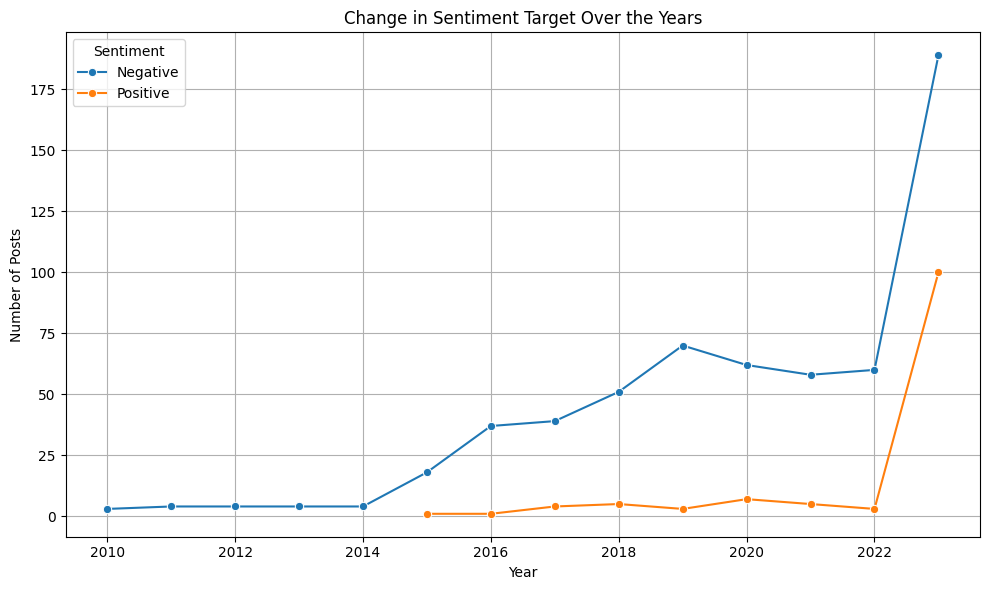

In [90]:
df['Year'] = df['Year'].astype(int)
df['Target'] = df['Target']


yearly_sentiment = df.groupby(['Year', 'Target']).size().reset_index(name='Count')


plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sentiment, x='Year', y='Count', hue='Target', marker='o')

plt.title('Change in Sentiment Target Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()
